In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot
df1 = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv", sep="\t", index_col=0) 
df2 = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_counts.tsv", sep="\t", index_col=0)
diff = [] 
diff1= []


for i in range(df1.shape[0]):
    a = df1[list(df1.columns)[:5]].iloc[i].values 
    b = df1[list(df1.columns)[5:]].iloc[i].values
    diff.append(stats.mannwhitneyu(a, b).pvalue) 
df1['mannwhitneyu'] = diff 
mann_whitneyu = set(df1.sort_values(by = 'mannwhitneyu', ascending = True).index[:10]) 

for i in range(df1.shape[0]): 
    a = df1[list(df1.columns)[:5]].iloc[i].values
    b = df1[list(df1.columns)[5:]].iloc[i].values
    diff1.append(stats.ttest_ind(a, b).pvalue)
df1['p-value_unpaired'] = diff1
ind = set(df1.sort_values(by = 'p-value_unpaired', ascending = True).index[:10])

intersection = list(mann_whitneyu & ind) 


print(mann_whitneyu)
print(ind)
print(intersection)


{'CTD-2147F2.1', 'LINC00858', 'RP11-399O19.9', 'SFTA2', 'LINC00460', 'RAET1L', 'RP5-884M6.1', 'AC007128.1', 'CST1', 'VAC14-AS1'}
{'CDH3', 'ETV4', 'FABP6', 'CGREF1', 'PDX1', 'C17orf96', 'IER5L', 'TESC', 'FUT1', 'LRRC8E'}
[]


###Задача 4

<AxesSubplot:xlabel='gene', ylabel='value'>

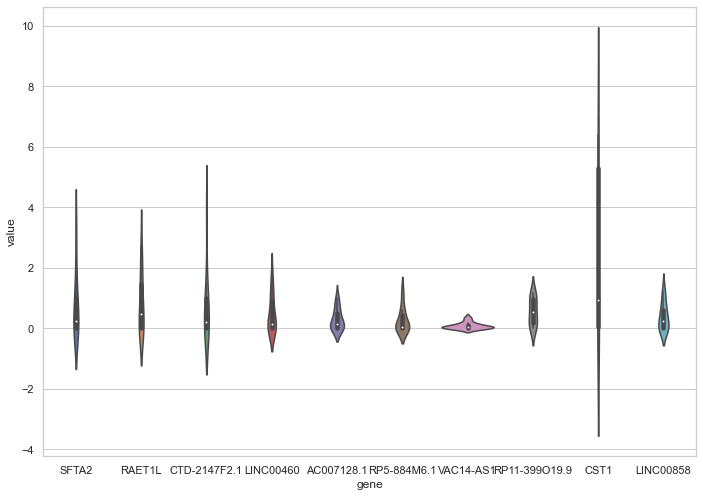

In [12]:
from matplotlib import pyplot
df1_10 = df1.sort_values(by='mannwhitneyu').head(10) 
df1_10['gene'] = df1_10.index 
df1_10 = pd.melt(df1_10, id_vars=['gene'], value_vars=['TCGA-A6-2682-01A', 'TCGA-A6-2683-01A', 'TCGA-A6-2685-01A',
'TCGA-A6-2686-01A', 'TCGA-A6-5662-01A', 'TCGA-A6-5667-11A',
'TCGA-AA-3489-11A', 'TCGA-AA-3496-11A', 'TCGA-AA-3511-11A',
'TCGA-AA-3514-11A']) 

import seaborn as sns
from matplotlib import pyplot

a4_dims = (11.7, 8.27) #строим график
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x="gene", y="value", data=df1_10)

<AxesSubplot:xlabel='gene', ylabel='value'>

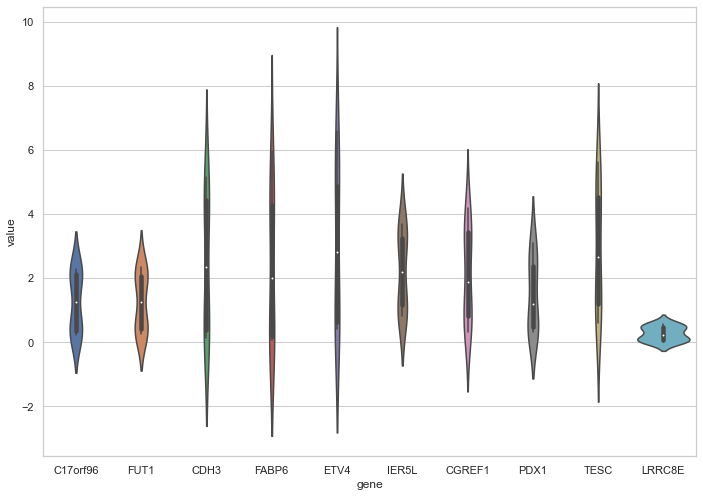

In [14]:
from matplotlib import pyplot
df1_10 = df1.sort_values(by='p-value_unpaired').head(10)
df1_10['gene'] = df1_10.index
df1_10 = pd.melt(df1_10, id_vars=['gene'], value_vars=['TCGA-A6-2682-01A', 'TCGA-A6-2683-01A', 'TCGA-A6-2685-01A',
'TCGA-A6-2686-01A', 'TCGA-A6-5662-01A', 'TCGA-A6-5667-11A',
'TCGA-AA-3489-11A', 'TCGA-AA-3496-11A', 'TCGA-AA-3511-11A',
'TCGA-AA-3514-11A'])

import seaborn as sns
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x="gene", y="value", data=df1_10)

###Задача 5

In [1]:
import random
import pandas as pd

file = open('all_genes.txt', 'r')

all_genes=[]
for line in file:
    all_genes.append(line.strip())

df=pd.DataFrame({})
for i in range(5):
    random_genes=set()
    while len(random_genes)<1000:
        new_gene=random.choice(all_genes)
        random_genes.add(new_gene)
    random_genes=list(random_genes)
    df[i]=random_genes

df.to_csv("random_genes.tsv", sep="\t")